In [1]:
library(dplyr)
library(ggplot2)
library(devtools)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'devtools' was built under R version 3.4.3"

In [2]:
library(statsr)

In [3]:
data(nycflights)

In [4]:
names(nycflights)

[1] "year"      "month"     "day"       "dep_time"  "dep_delay" "arr_time" 
 [7] "arr_delay" "carrier"   "tailnum"   "flight"    "origin"    "dest"     
[13] "air_time"  "distance"  "hour"      "minute"

In [5]:
sfo_feb_flights <- nycflights %>%
filter(dest == 'SFO', month == 2)
dim(sfo_feb_flights)

[1] 68 16

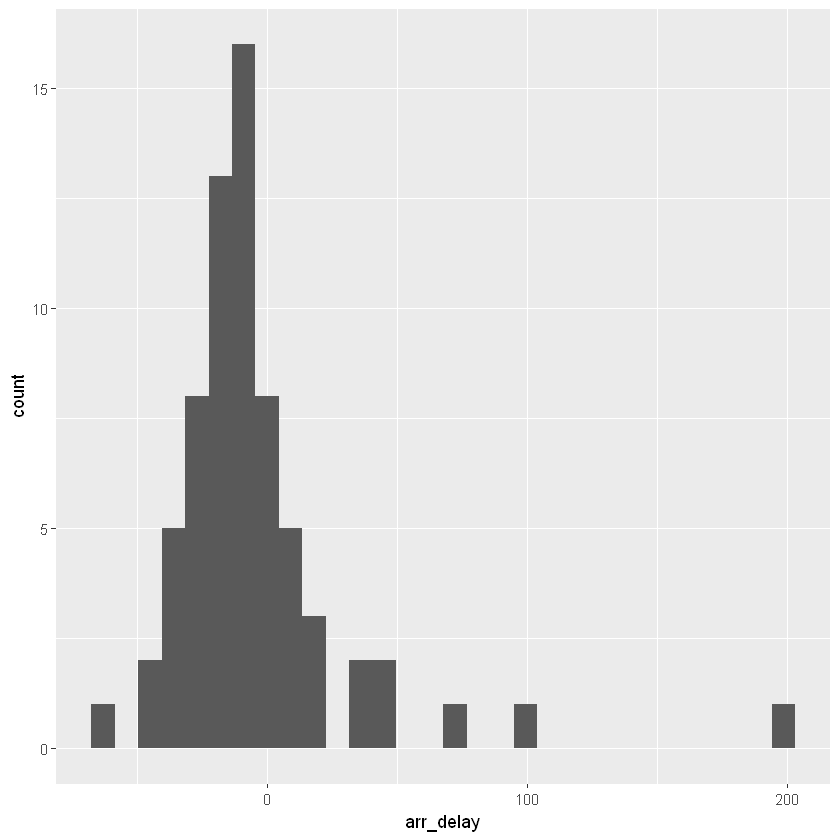

In [6]:
ggplot(sfo_feb_flights, aes(arr_delay)) + geom_histogram(bins = 30)

In [16]:
summary(sfo_feb_flights$arr_delay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -66.00  -21.25  -11.00   -4.50    2.00  196.00 

In [7]:
# 3
delay_summary_sfo_feb <- sfo_feb_flights %>%
group_by(carrier) %>%
summarise(median_delay = median(arr_delay), IQR_delay = IQR(arr_delay)) %>%
arrange(desc(IQR_delay))
delay_summary_sfo_feb

carrier,median_delay,IQR_delay
DL,-15.0,22.00
UA,-10.0,22.00
VX,-22.5,21.25
AA,5.0,17.50
B6,-10.5,12.25


In [48]:
max_mask <- with(delay_summary_sfo_feb, abs(IQR_delay - max(IQR_delay)) < 1e-3)
delay_summary_sfo_feb[max_mask,]

carrier,median_delay,IQR_delay
DL,-15,22
UA,-10,22


In [8]:
# 4
average_delay_by_month <- nycflights %>%
group_by(month) %>%
summarise(average_delay = mean(dep_delay)) %>%
arrange(desc(average_delay))

average_delay_by_month

month,average_delay
7,20.754559
6,20.350293
12,17.368189
4,14.554477
3,13.517602
5,13.264800
8,12.619097
2,10.687227
1,10.233333
9,6.872436


In [58]:
# 5
nycflights %>%
group_by(month) %>%
summarise(median_delay = median(dep_delay)) %>%
arrange(desc(median_delay))

month,median_delay
12,1
6,0
7,0
3,-1
5,-1
8,-1
1,-2
2,-2
4,-2
11,-2


In [29]:
nycflights$month <- as.factor(nycflights$month)

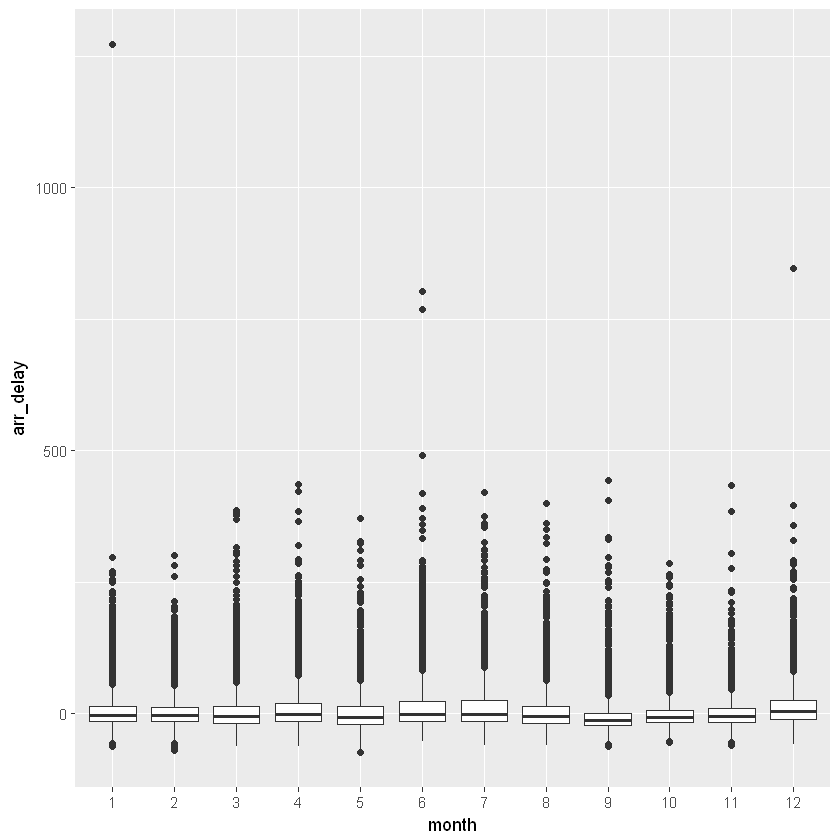

In [39]:
ggplot(data = nycflights, mapping = aes(x = month, y = arr_delay)) +
geom_boxplot()

In [42]:
# 7
nycflights %>%
group_by(origin) %>%
summarize(p_ontime = mean(dep_delay <= 0))

origin,p_ontime
EWR,0.5488064
JFK,0.6184271
LGA,0.6692163


In [44]:
names(nycflights)

[1] "year"      "month"     "day"       "dep_time"  "dep_delay" "arr_time" 
 [7] "arr_delay" "carrier"   "tailnum"   "flight"    "origin"    "dest"     
[13] "air_time"  "distance"  "hour"      "minute"

In [46]:
# 8
df8 <- nycflights %>%
mutate(avg_speed = distance / air_time) %>%
arrange(desc(avg_speed)) %>%
select(tailnum, avg_speed, distance)
head(df8)

tailnum,avg_speed,distance
N666DN,11.723077,762
N779JB,9.290698,1598
N571JB,9.236994,1598
N568JB,9.131429,1598
N5EHAA,9.131429,1598
N656JB,9.131429,1598


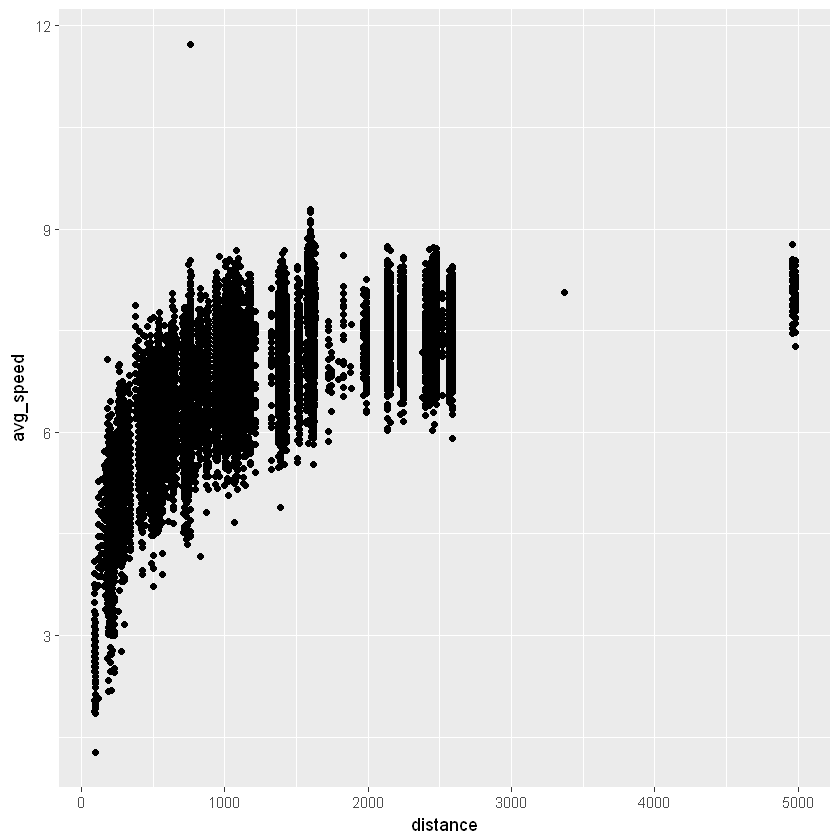

In [47]:
# 9
ggplot(df8, aes(distance, avg_speed)) +
geom_point()

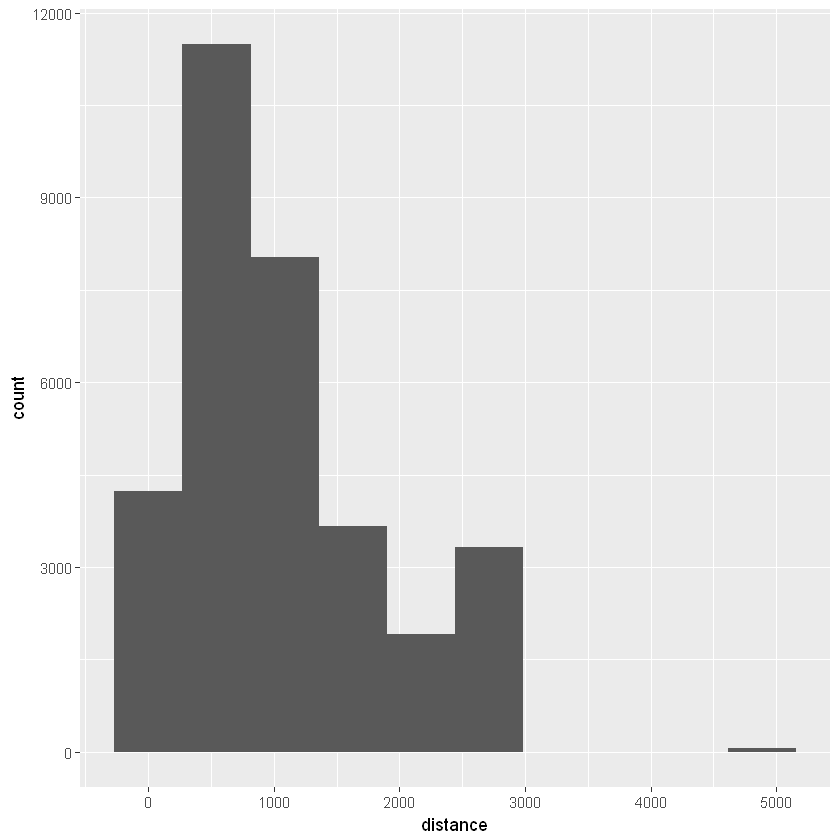

In [48]:
ggplot(df8, aes(distance)) +
geom_histogram(bins = 10)

In [57]:
# 10
df10 <- nycflights %>%
mutate(arr_type = ifelse(arr_delay <= 0, 'on time', 'delayed'),
      dep_type = ifelse(dep_delay < 5, 'on time', 'delayed')) %>%
group_by(dep_type) %>%
summarize(p_arr_ontime = mean(arr_type == 'on time'))

df10

dep_type,p_arr_ontime
delayed,0.1833639
on time,0.7762241
